# Imports

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
import data_func.read_data as read_data
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")


# Load datasets

In [2]:
dataframes = read_data.get_training_data()
X_frames_train = dataframes[0]
Y_frames_train = dataframes[1]
X_frames_test = read_data.get_test_data()


In [3]:
XTRA = X_frames_train[0]
XTRB = X_frames_train[1]
XTRC = X_frames_train[2]

YA = Y_frames_train[0]
YB = Y_frames_train[1]
YC = Y_frames_train[2]

In [4]:
print(XTRA["date_forecast"].head())
print(YA["time"].head())

0   2019-06-02 22:00:00
1   2019-06-02 22:15:00
2   2019-06-02 22:30:00
3   2019-06-02 22:45:00
4   2019-06-02 23:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2019-06-02 22:00:00
1   2019-06-02 23:00:00
2   2019-06-03 00:00:00
3   2019-06-03 01:00:00
4   2019-06-03 02:00:00
Name: time, dtype: datetime64[ns]


To align we can drop entry 0 for both Y and X

In [5]:
print(XTRB["date_forecast"].head())
print(YB["time"].head())

0   2019-01-01 00:00:00
1   2019-01-01 00:15:00
2   2019-01-01 00:30:00
3   2019-01-01 00:45:00
4   2019-01-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2018-12-31 23:00:00
1   2019-01-01 00:00:00
2   2019-01-01 01:00:00
3   2019-01-01 02:00:00
4   2019-01-01 03:00:00
Name: time, dtype: datetime64[ns]


To align we remove 0 and 1 from Y and 0 from X

In [6]:
print(XTRC["date_forecast"].head())
print(YC["time"].head())

0   2019-01-01 00:00:00
1   2019-01-01 00:15:00
2   2019-01-01 00:30:00
3   2019-01-01 00:45:00
4   2019-01-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2018-12-31 23:00:00
1   2019-01-01 00:00:00
2   2019-01-01 01:00:00
3   2019-01-01 02:00:00
4   2019-01-01 03:00:00
Name: time, dtype: datetime64[ns]


To align we remove 0 and 1 from Y and 0 from X

In [7]:
XTRA = XTRA.drop([0]).reset_index(drop=True)
XTRB = XTRB.drop([0]).reset_index(drop=True)
XTRC = XTRC.drop([0]).reset_index(drop=True)

YA = YA.drop([0]).reset_index(drop=True)
YB = YB.drop([0, 1]).reset_index(drop=True)
YC = YC.drop([0, 1]).reset_index(drop=True)

Need to reset index for aggregation function

In [8]:
for x in X_frames_test:
    print(x["date_forecast"].head())

0   2023-05-01 00:00:00
1   2023-05-01 00:15:00
2   2023-05-01 00:30:00
3   2023-05-01 00:45:00
4   2023-05-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2023-05-01 00:00:00
1   2023-05-01 00:15:00
2   2023-05-01 00:30:00
3   2023-05-01 00:45:00
4   2023-05-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2023-05-01 00:00:00
1   2023-05-01 00:15:00
2   2023-05-01 00:30:00
3   2023-05-01 00:45:00
4   2023-05-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]


drop 0 since we want to match on the "whole" hour.

In [9]:
for i in range(len(X_frames_test)):
    print(len(X_frames_test[i]))
    X_frames_test[i] = X_frames_test[i].drop([0]).reset_index(drop=True)

2880
2880
2880


## Cleaning Y-data

### B targets:

Start | End
--- | ---
2019-03-24 00:00:00 | 2019-03-28 00:00:00
2019-05-31 00:00:00 | 2019-06-03 14:00:00
2019-10-28 14:00:00 | 2019-10-30 23:00:00
2020-02-23 17:00:00 | 2020-03-06 06:00:00
2020-03-26 14:00:00 | 2020-03-27 22:00:00
2020-04-02 03:00:00 | 2020-04-16 08:00:00
2020-07-12 23:00:00 | 2020-08-25 23:00:00
2020-09-24 14:00:00 | 2020-09-25 23:00:00
2021-01-15 10:00:00 | 2021-04-19 09:00:00
2021-04-29 00:00:00 | 2021-05-01 23:00:00
2021-06-05 03:00:00 | 2021-06-07 08:00:00
2021-06-13 04:00:00 | 2021-06-14 10:00:00
2021-06-22 03:00:00 | 2021-06-24 08:00:00
2021-07-03 15:00:00 | 2021-07-06 07:00:00
2021-08-26 00:00:00 | 2021-09-03 22:00:00
2021-09-08 15:00:00 | 2021-09-14 13:00:00
2021-09-19 02:00:00 | 2021-09-27 10:00:00
2021-01-30 15:00:00 | 2022-02-04 09:00:00
2022-02-10 21:00:00 | 2022-02-13 07:00:00
2022-02-16 14:00:00 | 2022-02-24 06:00:00
2022-03-19 15:00:00 | 2022-04-13 06:00:00
2022-12-05 17:00:00 | 2023-01-05 08:00:00
2023-02-24 01:00:00 | 2023-02-27 05:00:00
2023-03-07 10:00:00 | 2023-03-10 01:00:00
2023-03-25 23:00:00 | 2023-03-28 02:00:00

### C-targets:

Start | End
---|---
2020-02-23 17:00:00 | 2020-03-08 08:00:00

In [10]:
start_times_b = [
    '2019-03-24 00:00:00',
'2019-05-31 00:00:00',
'2019-10-28 14:00:00',
'2020-02-23 17:00:00',
'2020-03-26 14:00:00',
'2020-04-02 03:00:00',
'2020-07-12 23:00:00',
'2020-09-24 14:00:00',
'2021-01-15 10:00:00',
'2021-04-29 00:00:00',
'2021-06-05 03:00:00',
'2021-06-13 04:00:00',
'2021-06-22 03:00:00',
'2021-07-03 15:00:00',
'2021-08-26 00:00:00',
'2021-09-08 15:00:00',
'2021-09-19 02:00:00',
'2021-01-30 15:00:00',
'2022-02-10 21:00:00',
'2022-02-16 14:00:00',
'2022-03-19 15:00:00',
'2022-12-05 17:00:00',
'2023-02-24 01:00:00',
'2023-03-07 10:00:00',
'2023-03-25 23:00:00'
]

end_times_b = [
    '2019-03-28 00:00:00',
'2019-06-03 14:00:00',
'2019-10-30 23:00:00',
'2020-03-06 06:00:00',
'2020-03-27 22:00:00',
'2020-04-16 08:00:00',
'2020-08-25 23:00:00',
'2020-09-25 23:00:00',
'2021-04-19 09:00:00',
'2021-05-01 23:00:00',
'2021-06-07 08:00:00',
'2021-06-14 10:00:00',
'2021-06-24 08:00:00',
'2021-07-06 07:00:00',
'2021-09-03 22:00:00',
'2021-09-14 13:00:00',
'2021-09-27 10:00:00',
'2022-02-04 09:00:00',
'2022-02-13 07:00:00',
'2022-02-24 06:00:00',
'2022-04-13 06:00:00',
'2023-01-05 08:00:00',
'2023-02-27 05:00:00',
'2023-03-10 01:00:00',
'2023-03-28 02:00:00'
]

print("before B drop: ", len(YB))

for i in range(len(start_times_b)):
    a = pd.to_datetime(start_times_b[i])
    b = pd.to_datetime(end_times_b[i])
    ind = YB[ (YB['time'] >= a) & (YB['time'] <= b)].index
    
    YB.drop(ind, inplace=True)

print("after B drop: ", len(YB))

print("before C drop: ", len(YC))

a = pd.to_datetime("2020-02-23 17:00:00")
b = pd.to_datetime('2020-03-08 08:00:00')
ind = YC[ (YC['time'] >= a) & (YC['time'] <= b)].index
    
YC.drop(ind, inplace=True)
print("after C drop: ", len(YC))

before B drop:  32846
after B drop:  20626
before C drop:  32153
after C drop:  31825


# Data clean up

In [11]:
# making shure that target values line up with x_values
import data_func.aggregation as data_agg

categorical_col = ['dew_or_rime:idx', 'precip_type_5min:idx']

def aggregate_correct_x(x: pd.DataFrame) -> pd.DataFrame:
   categorical = x[["date_forecast"] + categorical_col]
   mean = x.drop(columns=categorical_col)

   categorical = data_agg.gen_agg(categorical, data_agg.stocastic_median, merge_on='last')
   mean = data_agg.gen_agg(mean, "mean", merge_on='last')

   return pd.merge(categorical, mean, on="date_forecast")

def data_allign(x_train, y_train):

  y_train.dropna(inplace=True)
  x_train = aggregate_correct_x(x_train)
  combined_data = pd.merge(x_train, y_train, left_on='date_forecast', right_on='time')
  y_train = combined_data['pv_measurement']

  if 'time' and 'pv_measurement' in combined_data.columns:
    combined_data.drop(columns=['time', 'pv_measurement'], inplace=True)
    
  return combined_data, y_train



X_train = [XTRA, XTRB, XTRC]
Y_train = [YA, YB, YC]

for i in range(len(X_train)):
    X_train[i], Y_train[i] = data_allign(X_train[i], Y_train[i])

for j in range(len(X_frames_test)):
    X_frames_test[j] = aggregate_correct_x(X_frames_test[j])




In [12]:
#Verify length matches
for x in range(len(X_train)):
    print("x,y: ", len(X_train[x]), len(Y_train[x]))



x,y:  34059 34059
x,y:  20598 20598
x,y:  25742 25742


# Feature engineering

In [13]:
import data_func.timeseasonality as DTS
import data_func.one_hot_encoding as OHE
for i in range(len(X_train)):
    X_train[i] = DTS.append_seasonal_columns(X_train[i])
    X_train[i].drop(columns=['date_forecast'], inplace=True)

for i in range(len(X_frames_test)):
    X_frames_test[i] = DTS.append_seasonal_columns(X_frames_test[i])
    X_frames_test[i].drop(columns=['date_forecast'], inplace=True)

# THIS SECTION CAN ONLY WORK IF THE PREVIOUS AGGREGATION IS DONE INDIVIDUALLY FOR CATEGORICAL DATA
# import data_func.one_hot_encoding as OHE

for i in range(len(X_train)):
     X_train[i] = OHE.one_hot_encode(X_train[i], ['dew_or_rime:idx', 'precip_type_5min:idx'])

for i in range(len(X_frames_test)):
     X_frames_test[i] = OHE.one_hot_encode(X_frames_test[i], ['dew_or_rime:idx', 'precip_type_5min:idx'])



In [14]:
X_train[0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
absolute_humidity_2m:gm3,34059.0,6.322364,2.799469,0.700000,4.200000,5.825000e+00,8.250000,1.740000e+01
air_density_2m:kgm3,34059.0,1.253278,0.037206,1.145000,1.227500,1.251500e+00,1.277250,1.426000e+00
ceiling_height_agl:m,27944.0,2968.545654,2557.649414,27.875000,1127.468750,1.979925e+03,4152.162598,1.229490e+04
clear_sky_energy_1h:J,34059.0,552703.625000,848353.312500,0.000000,0.000000,1.964755e+04,902072.968750,2.998650e+06
clear_sky_rad:W,34059.0,153.528702,236.248672,0.000000,0.000000,4.300000e+00,249.774994,8.338000e+02
cloud_base_agl:m,31705.0,1727.325317,1802.182373,27.799999,583.000000,1.147200e+03,2082.824951,1.166355e+04
dew_point_2m:K,34059.0,275.971863,6.892369,251.000000,271.299988,2.760000e+02,281.349976,2.937000e+02
diffuse_rad:W,34059.0,42.072437,62.838772,0.000000,0.000000,2.200000e+00,70.750000,3.355500e+02
diffuse_rad_1h:J,34059.0,151460.609375,223527.250000,0.000000,0.000000,1.595988e+04,254801.750000,1.184026e+06
direct_rad:W,34059.0,52.630783,115.252907,0.000000,0.000000,0.000000e+00,34.075001,6.809500e+02


In [36]:
X_frames_test[0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
absolute_humidity_2m:gm3,720.0,8.207511e+00,2.174437e+00,3.200000,6.700000,8.075001e+00,1.000000e+01,1.360000e+01
air_density_2m:kgm3,720.0,1.233123e+00,3.207187e-02,1.151000,1.209000,1.238250e+00,1.260000e+00,1.300000e+00
ceiling_height_agl:m,539.0,3.094400e+03,2.935860e+03,53.299999,973.349976,1.682825e+03,4.138388e+03,1.141760e+04
clear_sky_energy_1h:J,720.0,1.227651e+06,1.101479e+06,0.000000,63704.814453,1.030980e+06,2.348519e+06,2.998053e+06
clear_sky_rad:W,720.0,3.410140e+02,3.069118e+02,0.000000,16.337499,2.793625e+02,6.492313e+02,8.334250e+02
cloud_base_agl:m,654.0,1.872781e+03,2.073476e+03,30.250000,513.025024,1.059325e+03,2.423094e+03,1.125670e+04
dew_point_2m:K,720.0,2.808040e+02,4.330719e+00,268.100006,278.024994,2.810625e+02,2.843500e+02,2.894500e+02
diffuse_rad:W,720.0,8.490232e+01,7.859216e+01,0.000000,8.500000,7.442500e+01,1.339812e+02,3.140500e+02
diffuse_rad_1h:J,720.0,3.056483e+05,2.783286e+05,0.000000,35361.856445,2.716135e+05,4.893962e+05,1.100747e+06
direct_rad:W,720.0,1.147817e+02,1.721811e+02,0.000000,0.025000,1.437500e+01,1.951937e+02,6.675000e+02


## Normalizing columns for neural network

### A-set

In [15]:
X_train[0].isna().sum()

absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m               6115
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   2354
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
pressure_100m:hPa                     0
pressure_50m:hPa                      0
prob_rime:p                           0


In [16]:
X_train[0].drop(columns=["snow_density:kgm3", "elevation:m"], inplace=True)
values = {"ceiling_height_agl:m": 20000, "cloud_base_agl:m": 20000}
X_train[0].fillna(value=values, inplace=True)
X_train[0].isna().sum()

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2                   0
relative_humidity_1000hPa:p       0
sfc_pressure:hPa                  0
snow_depth:cm               

### B-set

In [17]:
X_train[1].isna().sum()

absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m               2970
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   1582
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
pressure_100m:hPa                     0
pressure_50m:hPa                      0
prob_rime:p                           0


In [18]:
X_train[1].drop(columns=["snow_density:kgm3", "elevation:m"], inplace=True)
values = {"ceiling_height_agl:m": 20000, "cloud_base_agl:m": 20000}
X_train[1].fillna(value=values, inplace=True)
X_train[1].isna().sum()

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2                   0
relative_humidity_1000hPa:p       0
sfc_pressure:hPa                  0
snow_depth:cm               

### C-set

In [19]:
X_train[2].isna().sum()

absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m               5124
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   2195
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
pressure_100m:hPa                     0
pressure_50m:hPa                      0
prob_rime:p                           0


In [20]:
X_train[2].drop(columns=["snow_density:kgm3", "elevation:m"], inplace=True)
values = {"ceiling_height_agl:m": 20000, "cloud_base_agl:m": 20000}
X_train[2].fillna(value=values, inplace=True)
X_train[2].isna().sum()

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2                   0
relative_humidity_1000hPa:p       0
sfc_pressure:hPa                  0
snow_depth:cm               

In [21]:
import tensorflow as tf

normalizer_A = tf.keras.layers.Normalization(axis=-1)
normalizer_A.adapt(X_train[0])

first = np.array(X_train[0][:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer_A(first).numpy())

normalizer_B = tf.keras.layers.Normalization(axis=-1)
normalizer_B.adapt(X_train[1])
normalizer_C = tf.keras.layers.Normalization(axis=-1)
normalizer_C.adapt(X_train[2])

First example: [[    7.7      1.23  1718.62     0.       0.    1718.62   280.3      0.
      0.       0.       0.      99.3      0.       0.       0.       0.
      0.       0.       1.    1005.97     0.     993.45   999.45     0.
      0.      70.7   1005.47     0.       0.       0.       0.2    351.51
     -4.07     0.     286.45   100.   40901.43     3.55    -3.55    -0.3
      0.      -0.26     0.97     0.49    -0.87     0.       1.       0.
      1.       0.       0.       0.  ]]

Normalized: [[ 0.49 -0.71 -0.62 -0.65 -0.65 -0.26  0.63 -0.67 -0.68 -0.46 -0.46  0.93
  -0.15 -0.09 -0.19 -0.1  -0.12 -1.03  0.96 -0.28 -0.2  -0.26 -0.27 -0.08
  -0.25 -0.24 -0.28 -0.16  0.   -0.05  0.46  1.72 -0.17 -0.54  0.98  0.77
   0.47  0.28 -1.46 -0.47 -0.01 -0.37  1.37  0.71 -1.25 -0.09  0.19 -0.17
   0.24 -0.22 -0.07 -0.08]]


# Training the model

In [22]:
def build_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(64, activation="relu", input_shape=[len(X_train[0].keys())]),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    optim = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optim, metrics=["mae", "mse"])

    return model

In [23]:
x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(X_train[0], Y_train[0], test_size=0.2, random_state=None)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(X_train[1], Y_train[1], test_size=0.2, random_state=None)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(X_train[2], Y_train[2], test_size=0.2, random_state=None)

In [32]:
model_a = build_model(normalizer_A)
model_b = build_model(normalizer_B)
model_c = build_model(normalizer_C)


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_a = model_a.fit(
    x_train_a,
    y_train_a,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_b = model_b.fit(
    x_train_b,
    y_train_b,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_c = model_c.fit(
    x_train_c,
    y_train_c,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

Epoch 1/1000
682/682 [==============================] - 1s 702us/step - loss: 794344.1250 - mae: 417.5031 - mse: 794344.1250 - val_loss: 283423.4062 - val_mae: 282.9851 - val_mse: 283423.4062
Epoch 2/1000
682/682 [==============================] - 0s 547us/step - loss: 262260.4688 - mae: 264.7055 - mse: 262260.4688 - val_loss: 239832.0469 - val_mae: 249.8617 - val_mse: 239832.0469
Epoch 3/1000
682/682 [==============================] - 0s 600us/step - loss: 242881.5000 - mae: 249.8160 - mse: 242881.5000 - val_loss: 230781.3438 - val_mae: 240.0526 - val_mse: 230781.3438
Epoch 4/1000
682/682 [==============================] - 0s 703us/step - loss: 237284.0625 - mae: 245.5792 - mse: 237284.0625 - val_loss: 226667.2656 - val_mae: 238.8412 - val_mse: 226667.2656
Epoch 5/1000
682/682 [==============================] - 0s 553us/step - loss: 232655.3906 - mae: 241.2916 - mse: 232655.3906 - val_loss: 223009.9219 - val_mae: 234.7466 - val_mse: 223009.9219
Epoch 6/1000
682/682 [==================

In [33]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_a = model_a.fit(
    X_train[0],
    Y_train[0],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_b = model_b.fit(
    X_train[1],
    Y_train[1],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_c = model_c.fit(
    X_train[2],
    Y_train[2],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

Epoch 1/1000
852/852 [==============================] - 1s 660us/step - loss: 704765.6250 - mae: 397.4450 - mse: 704765.6250 - val_loss: 234376.9375 - val_mae: 239.6668 - val_mse: 234376.9375
Epoch 2/1000
852/852 [==============================] - 1s 592us/step - loss: 256767.6094 - mae: 268.4013 - mse: 256767.6094 - val_loss: 196650.5781 - val_mae: 224.0316 - val_mse: 196650.5781
Epoch 3/1000
852/852 [==============================] - 0s 568us/step - loss: 247695.6406 - mae: 259.2153 - mse: 247695.6406 - val_loss: 182651.6406 - val_mae: 213.9727 - val_mse: 182651.6406
Epoch 4/1000
852/852 [==============================] - 1s 661us/step - loss: 243306.4062 - mae: 251.6628 - mse: 243306.4062 - val_loss: 177523.0938 - val_mae: 205.9389 - val_mse: 177523.0938
Epoch 5/1000
852/852 [==============================] - 1s 764us/step - loss: 240183.0156 - mae: 246.1150 - mse: 240183.0156 - val_loss: 173879.6406 - val_mae: 201.9181 - val_mse: 173879.6406
Epoch 6/1000
852/852 [==================

In [26]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1000000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

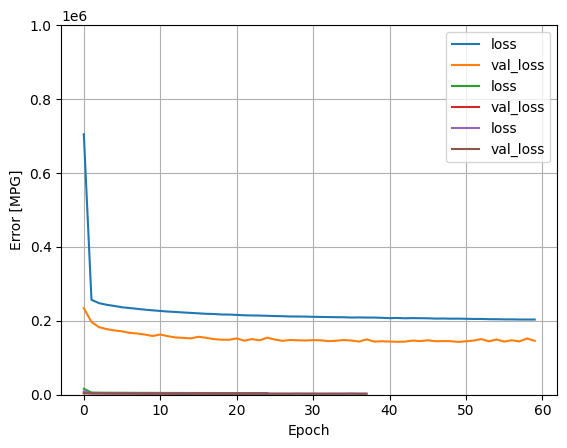

In [34]:
plot_loss(history_a)
plot_loss(history_b)
plot_loss(history_c)

In [31]:
print(model_a.evaluate(x_val_a, y_val_a))
print(model_b.evaluate(x_val_b, y_val_b))
print(model_c.evaluate(x_val_c, y_val_c))

213/213 [==============================] - 0s 435us/step - loss: 194897.4062 - mae: 210.9886 - mse: 194897.4062
[194897.40625, 210.9885711669922, 194897.40625]
129/129 [==============================] - 0s 421us/step - loss: 4286.3613 - mae: 27.9469 - mse: 4286.3613
[4286.361328125, 27.946853637695312, 4286.361328125]
161/161 [==============================] - 0s 505us/step - loss: 3020.3521 - mae: 24.2190 - mse: 3020.3521
[3020.35205078125, 24.219013214111328, 3020.35205078125]


In [30]:
y_a = model_a.predict(x_val_a)
y_b = model_b.predict(x_val_b)
y_c = model_c.predict(x_val_c)

161/161 [==============================] - 0s 386us/step


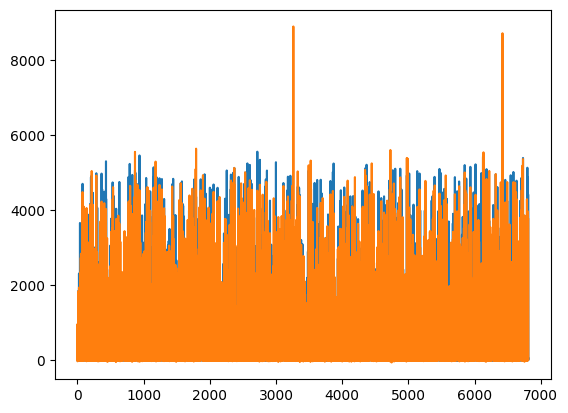

In [31]:
y_val_a.index = range(0, y_val_a.shape[0])
#y.index = range(0, y.shape[0])
plt.plot(y_val_a)
plt.plot(y_a)


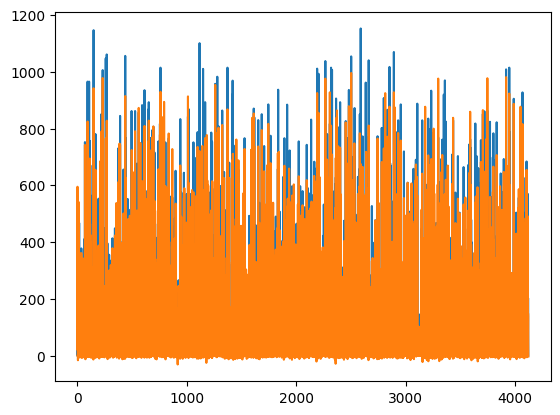

In [32]:
y_val_b.index = range(0, y_val_b.shape[0])
#y.index = range(0, y.shape[0])
plt.plot(y_val_b)
plt.plot(y_b)


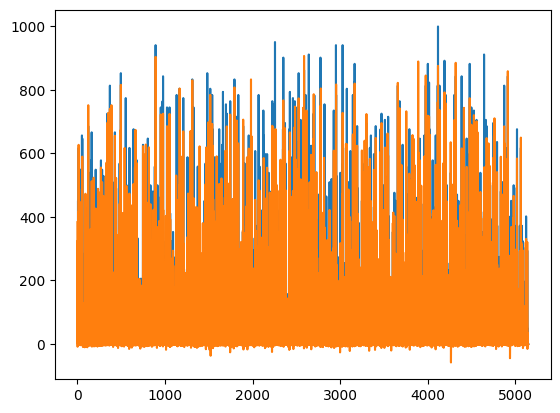

In [33]:
y_val_c.index = range(0, y_val_c.shape[0])
#y.index = range(0, y.shape[0])
plt.plot(y_val_c)
plt.plot(y_c)


In [ ]:
print(len(x_val_a), len(y))

# Make predictions

In [35]:
# Do some more stuff
y_a = model_a.predict(X_frames_test[0])
y_b = model_b.predict(X_frames_test[1])
y_c = model_c.predict(X_frames_test[2])

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2357, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'normalization' (type Normalization).
    
    Dimensions must be equal, but are 51 and 52 for '{{node sequential_3/normalization/sub}} = Sub[T=DT_FLOAT](sequential_3/Cast, sequential_3/normalization/sub/y)' with input shapes: [?,51], [1,52].
    
    Call arguments received by layer 'normalization' (type Normalization):
      • inputs=tf.Tensor(shape=(None, 51), dtype=float32)


# Evaluate prediction

In [ ]:

# Evaluate the model based on the validation data

mse_a = mean_squared_error(y_val_a, model_a.predict(x_val_a))
print("MSE for A: ", mse_a)
mse_b = mean_squared_error(y_val_b, model_b.predict(x_val_b))
print("MSE for B: ", mse_b)
mse_c = mean_squared_error(y_val_c, model_c.predict(x_val_c))
print("MSE for C: ", mse_c)
print("Mean MSE: ", (mse_a + mse_b + mse_c) / 3)

# Evaluate the predictions

score_a = model_a.score(x_val_a, y_val_a)
score_b = model_b.score(x_val_b, y_val_b)
score_c = model_c.score(x_val_c, y_val_c)

print("Score A: ", score_a)
print("Score B: ", score_b)
print("Score C: ", score_c)
print('')

# Get feature importance scores
models = [(model_a, 'A'), (model_b, 'B'), (model_c, 'C')]
for model in models:

    feature_importance_scores = model[0].feature_importances_

# Create a DataFrame to associate features with their importance scores
    feature_importance_df1 = pd.DataFrame({'Feature': x_train_a.columns, 'Importance': feature_importance_scores})

# Sort features by importance in descending order
    feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance scores
    
    print(f'Model {model[1]}')
    print(feature_importance_df1.head(10))
    print('')


# Create submission

In [ ]:
y_pred = np.concatenate((y_pred_a, y_pred_b, y_pred_c), axis=0)

In [ ]:
y_test_pred = y_pred

test = pd.read_csv('../data/test.csv')
test['prediction'] = y_test_pred
sample_submission = pd.read_csv('../data/sample_submission.csv')
submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
submission.to_csv('submission.csv', index=False)